In [3]:
%cd ~/src/laboratori/0102

/home/jovyan/src/laboratori/0102


# **Introduzione al Machine Learning -- laboratorio 1 e 2**


*   Colab, python, librerie
*   Generare numeri casuali
*   Fare grafici
*   Caricare file




Notebook ispirato a Jupyter Notebook

Celle di codice e celle di testo

Celle di codice, di default c'è python

Le celle di codice si eseguono con Ctrl-Enter

In [4]:
print('Hello World!')

Hello World!


Vediamo che versione di python c'è.

Iniziare con il punto esclamativo vuol dire che il comando passa alla shell linux.

In [5]:
!python --version

Python 3.11.6


Librerie fondamentali che useremo:

*   numpy (numeric python) `import numpy as np`
*   matplotlib (grafici scientifici) `import matplotlib.pyplot as plt`
*   scipy (cose avanzate sopra numpy, funzioni di distribuzione)
*   pandas (serve a gestire i dataset, detti DataFrame)
*   seaborn (grafici più sofisticati)
*   torch (tipo numpy, ma anche su gpu, e deep learning)
*   tensorflow (libreria classica per deep learning)

Inizialmente cercheremo di usare poco le librerie, anche a costo di forzare il metodo.



In [6]:
!ls -al

total 816
drwxr-xr-x 2 jovyan 984   4096 Feb 20 08:30 .
drwxr-xr-x 3 jovyan 984   4096 Feb 19 10:17 ..
-rw-r--r-- 1 jovyan 984 329721 Feb 19 10:15 body.xlsx
-rw-r--r-- 1 jovyan 984 494789 Feb 20 08:31 inml25lab0102.ipynb


Vogliamo generare un campione casuale.

In [7]:
import random

In [8]:
random.randint(1,6)

3

In [9]:
dice = random.randint(1,6)

In [10]:
random.randint(1,6)
random.randint(1,6)
random.randint(1,6)

1

Viene visualizzato come output aggiuntivo solo il valore ritornato dall'ultima funzione.

In [11]:
print(random.randint(1,6))
print(random.randint(1,6))
print(random.randint(1,6))

1
3
6


In [12]:
random.seed()
print(random.randint(1,6))
print(random.randint(1,6))
print(random.randint(1,6))

2
2
1


Così la sequenza ha qualche chance di sembrare casuale.

In [13]:
random.seed(114)
print(random.randint(1,6))
print(random.randint(1,6))
print(random.randint(1,6))

2
5
1


Così i numeri generati sono riproducibili.

In [14]:
dices = [] # lista vuota
for i in range(10):
    dices.append(random.randint(1,6))
print(dices)

[3, 6, 2, 6, 5, 1, 2, 5, 5, 6]


In [15]:
dices = []
for _ in range(10): # _ è una variabile che può buttare
    dices += [random.randint(1,6)] # + concatena liste
print(dices)

[5, 3, 5, 1, 5, 3, 3, 6, 1, 1]


In [16]:
dices = [random.randint(1,6) for _ in range(10)]
print(dices)

[4, 4, 1, 5, 5, 3, 3, 5, 6, 6]


La list comprehension è il modo "pythonico" di fare queste cose.

In [17]:
# List comprehension
dices = [random.randint(1, 6) for _ in range(600)]

In [18]:
dices[:15]

[4, 5, 4, 2, 4, 6, 2, 3, 5, 3, 6, 1, 1, 2, 5]

In [19]:
dices.count(1) # conta quante volte compare un elemento

107

In [20]:
list(range(1, 7)) # list() per "vedere" i numeri

[1, 2, 3, 4, 5, 6]

In [21]:
# Conto le frequenze
freqs = [dices.count(i) for i in range(1, 7)]
print(freqs)

[107, 90, 111, 111, 87, 94]


In [22]:
import pandas as pd               # libreria per gestire i dataset
import numpy as np                # libreria per matematica e array
import matplotlib.pyplot as plt   # libreria per i grafici

path = 'body.xlsx'
ret = pd.read_excel(path, sheet_name=None)

In [23]:
type(ret)

dict

In [24]:
print(ret.keys())
print(len(ret))

dict_keys(['body.dat', 'Sheet3', 'Sheet4', 'Sheet4 (2)', 'Sheet6', 'Sheet1', 'Sheet2'])
7


In [25]:
type(ret['body.dat'])

pandas.core.frame.DataFrame

In [26]:
ret['body.dat']

,Id,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
0,1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
503,504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
504,505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
505,506,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0


In [27]:
body = pd.read_excel(path, index_col=0)
body

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


In [28]:
body.columns

Index(['Biacromial diameter (see Fig. 2)',
       'Biiliac diameter, or "pelvic breadth" (see Fig. 2)',
       'Bitrochanteric diameter (see Fig. 2)',
       'Chest depth between spine and sternum at nipple level,',
       'Chest diameter at nipple level, mid-expiration',
       'Elbow diameter, sum of two elbows',
       'Wrist diameter, sum of two wrists', 'Knee diameter, sum of two knees',
       'Ankle diameter, sum of two ankles',
       'Shoulder girth over deltoid muscles',
       'Chest girth, nipple line in males and just above breast',
       'Waist girth, narrowest part of torso below the rib cage,',
       'Navel (or "Abdominal") girth at umbilicus and iliac crest,',
       'Hip girth at level of bitrochanteric diameter',
       'Thigh girth below gluteal fold, average of right and left',
       'Bicep girth, flexed, average of right and left girths',
       'Forearm girth, extended, palm up, average of right and',
       'Knee girth over patella, slightly flexed position, 

In [29]:
age = body['Age (years)']
type(age)

pandas.core.series.Series

In [30]:
age = list(age)

In [31]:
age[0:15]

[21, 23, 28, 23, 22, 21, 26, 27, 23, 21, 23, 22, 20, 26, 23]

In [32]:
min(age), max(age)

(18, 67)

In [33]:
freqs = [age.count(i) for i in range(min(age), max(age)+1)]

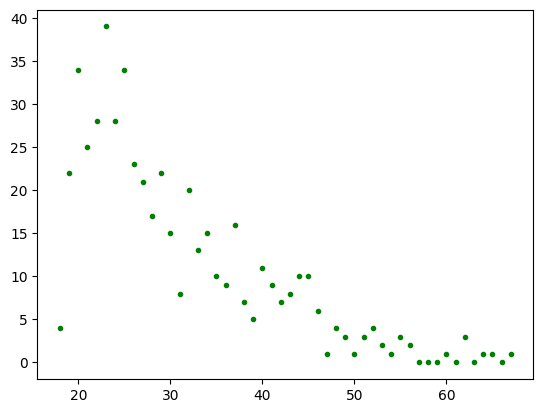

In [34]:
plt.plot(range(min(age), max(age)+1), freqs, 'g.')
plt.savefig('age.png')
plt.savefig('age.pdf')
plt.show()

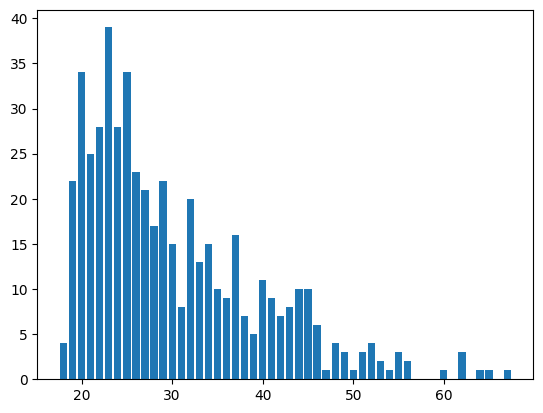

In [35]:
plt.bar(range(min(age), max(age)+1), freqs)
plt.savefig('age.png')
plt.savefig('age.pdf')
plt.show()

Vorrei raccogliere in bin...

(array([113., 145.,  82.,  63.,  39.,  35.,  15.,   8.,   4.,   3.]),
 array([18. , 22.9, 27.8, 32.7, 37.6, 42.5, 47.4, 52.3, 57.2, 62.1, 67. ]),
 <BarContainer object of 10 artists>)

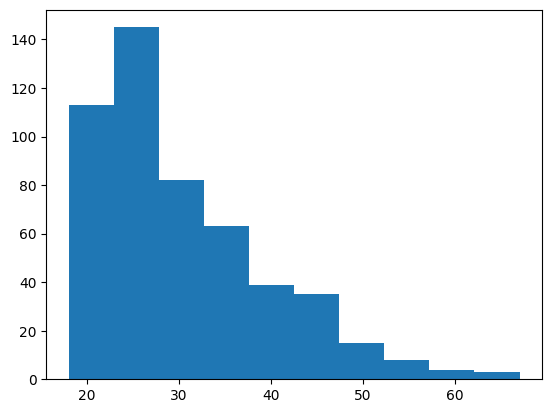

In [36]:
plt.hist(age)

Attenzione che se il campione è a valori interi, i bin dovrebbero contenere ciascuno lo stesso numero di interi, e di default potrebbe non essere così.

In [37]:
list(range(18,70,3))

[18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69]

(array([60., 92., 85., 60., 43., 38., 32., 25., 25., 17.,  8.,  9.,  6.,
         0.,  4.,  2.,  1.]),
 array([18., 21., 24., 27., 30., 33., 36., 39., 42., 45., 48., 51., 54.,
        57., 60., 63., 66., 69.]),
 <BarContainer object of 17 artists>)

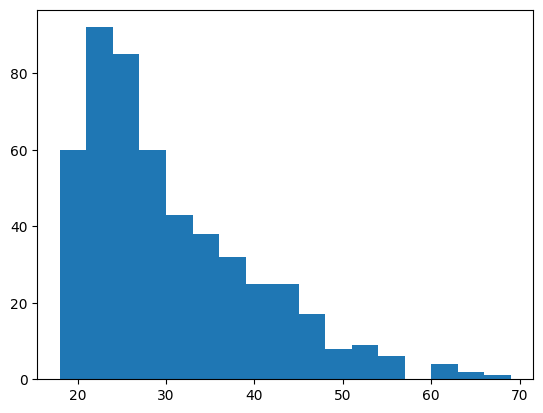

In [38]:
plt.hist(age, bins=range(18,70,3))

Generiamo un campione Gaussiano

In [39]:
n = 200
mu = 42
sigma = 7

X = [random.gauss(mu, sigma) for _ in range(n)]

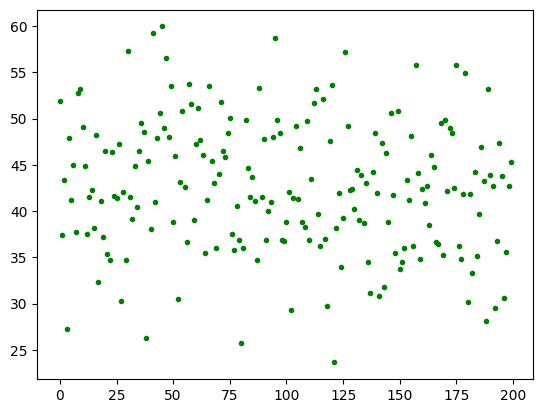

In [40]:
plt.plot(X, 'g.') # g: green '.': dot

(array([ 3.,  7.,  7., 27., 27., 42., 27., 31., 16.,  8.,  5.]),
 array([23.63490876, 26.93635415, 30.23779954, 33.53924494, 36.84069033,
        40.14213573, 43.44358112, 46.74502652, 50.04647191, 53.34791731,
        56.6493627 , 59.9508081 ]),
 <BarContainer object of 11 artists>)

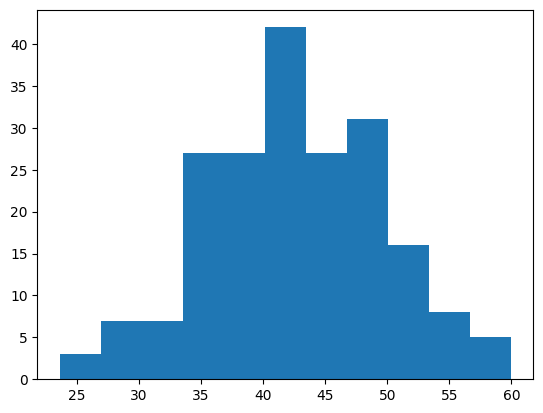

In [41]:
plt.hist(X, bins='auto')

(array([13., 42., 75., 52., 18.]),
 array([23.63490876, 30.89808862, 38.16126849, 45.42444836, 52.68762823,
        59.9508081 ]),
 <BarContainer object of 5 artists>)

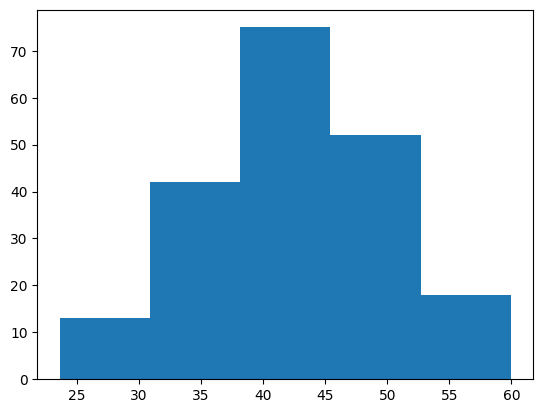

In [42]:
plt.hist(X, bins=5) # non esagerare o andare troppo scarsi con i bin

In [43]:
height = list(body['Height (cm)'])

In [44]:
sorted_height = sorted(height) # crea una nuova lista ordinata
print(height[0:10])
print(sorted_height[0:10])

[174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, 184.0]
[147.2, 149.5, 149.9, 151.1, 151.1, 152.0, 152.0, 152.4, 152.4, 152.4]


In [45]:
height.sort() # la lista si può ordinare "sul posto"

In [46]:
print(height[0:10])

[147.2, 149.5, 149.9, 151.1, 151.1, 152.0, 152.0, 152.4, 152.4, 152.4]


In [47]:
height = body['Height (cm)']
type(height)

pandas.core.series.Series

In [48]:
print(height)

Id
1      174.0
2      175.3
3      193.5
4      186.5
5      187.2
       ...  
503    176.5
504    164.4
505    160.7
506    174.0
507    163.8
Name: Height (cm), Length: 507, dtype: float64


In [49]:
height.to_numpy() # Si può estrarre la parte solo numerica dell'oggetto pandas

array([174. , 175.3, 193.5, 186.5, 187.2, 181.5, 184. , 184.5, 175. ,
       184. , 180. , 177.8, 192. , 176. , 174. , 184. , 192.7, 171.5,
       173. , 176. , 176. , 180.5, 172.7, 176. , 173.5, 178. , 180.3,
       180.3, 164.5, 173. , 183.5, 175.5, 188. , 189.2, 172.8, 170. ,
       182. , 170. , 177.8, 184.2, 186.7, 171.4, 172.7, 175.3, 180.3,
       182.9, 188. , 177.2, 172.1, 167. , 169.5, 174. , 172.7, 182.2,
       164.1, 163. , 171.5, 184.2, 174. , 174. , 177. , 186. , 167. ,
       171.8, 182. , 167. , 177.8, 164.5, 192. , 175.5, 171.2, 181.6,
       167.4, 181.1, 177. , 174.5, 177.5, 170.5, 182.4, 197.1, 180.1,
       175.5, 180.6, 184.4, 175.5, 180.6, 177. , 177.1, 181.6, 176.5,
       175. , 174. , 165.1, 177. , 192. , 176.5, 169.4, 182.1, 179.8,
       175.3, 184.9, 177.3, 167.4, 178.1, 168.9, 157.2, 180.3, 170.2,
       177.8, 172.7, 165.1, 186.7, 165.1, 174. , 175.3, 185.4, 177.8,
       180.3, 180.3, 177.8, 177.8, 177.8, 177.8, 177.8, 163.8, 188. ,
       198.1, 175.3,

In [50]:
height = height.to_numpy() # oggetto numpy
print(type(height))

<class 'numpy.ndarray'>


Gli array di numpy possono essere vettori di un indice, matrici di due indici o anche roba più grossa (di solito si dice tensori) di tre e più indici.

In [51]:
height.shape # (507,) un indice solo, con 507 elementi

(507,)

In [52]:
body.to_numpy().shape # (507, 25) due indici, con 507 righe e 25 colonne

(507, 25)

In [53]:
height.sort() # sort in-place

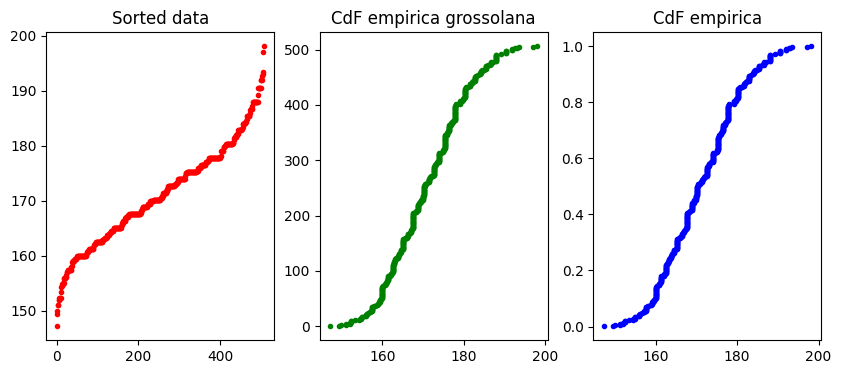

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4)) # 1 riga, 2 colonne

ax[0].plot(height, 'r.')
ax[0].set_title('Sorted data')

ax[1].plot(height, range(len(height)), 'g.')
ax[1].set_title('CdF empirica grossolana')

step = 1./len(height)

ax[2].plot(height, np.arange(step/2, 1, step), 'b.')
ax[2].set_title('CdF empirica')

plt.show()

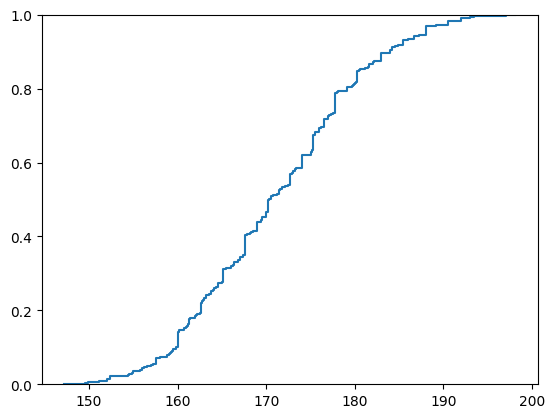

In [55]:
plt.ecdf(height)

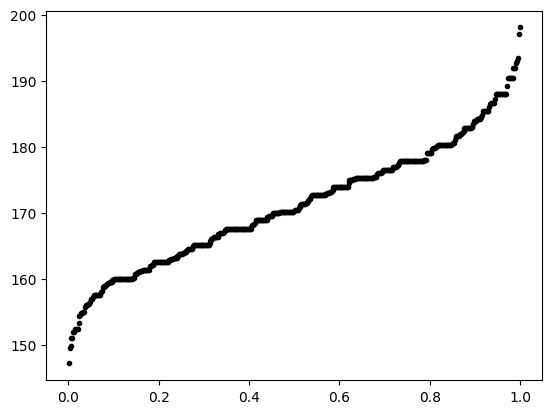

In [56]:
# Diagramma Q-Q

plt.plot(np.arange(step/2, 1, step), height, 'k.')

# usare scipy.stats.norm per casa

Calcoliamo la CdF empirica e il diagramma Q-Q

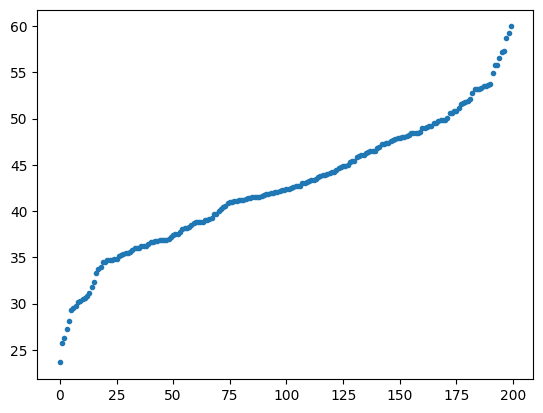

In [57]:
Y = sorted(X)
plt.plot(Y, '.')

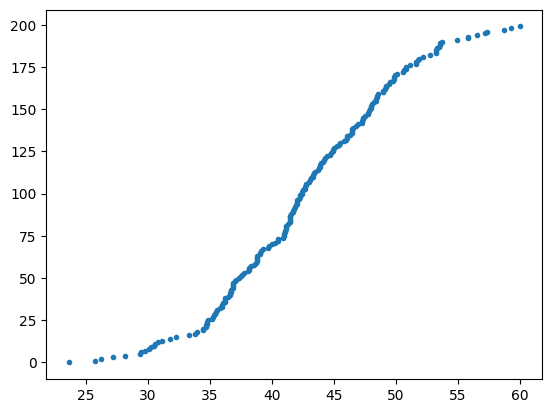

In [58]:
plt.plot(Y, range(n), '.') # Non ancora la CdF empirica

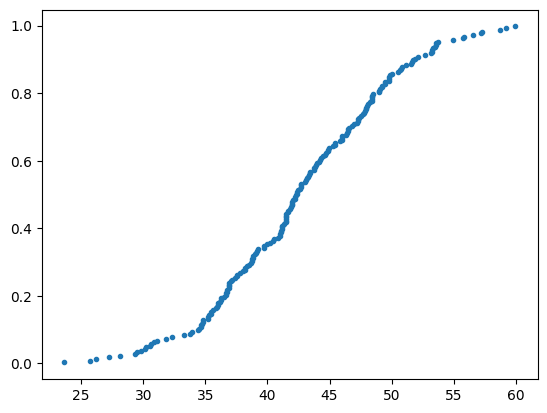

In [59]:
plt.plot(Y, [(i+0.5)/n for i in range(n)], '.')

C'è un modo più leggibile di gestire i numeri da 0 a 1, usando numpy

In [60]:
import numpy as np

np.linspace(0.5/n, 1-0.5/n, n)

array([0.0025, 0.0075, 0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375,
       0.0425, 0.0475, 0.0525, 0.0575, 0.0625, 0.0675, 0.0725, 0.0775,
       0.0825, 0.0875, 0.0925, 0.0975, 0.1025, 0.1075, 0.1125, 0.1175,
       0.1225, 0.1275, 0.1325, 0.1375, 0.1425, 0.1475, 0.1525, 0.1575,
       0.1625, 0.1675, 0.1725, 0.1775, 0.1825, 0.1875, 0.1925, 0.1975,
       0.2025, 0.2075, 0.2125, 0.2175, 0.2225, 0.2275, 0.2325, 0.2375,
       0.2425, 0.2475, 0.2525, 0.2575, 0.2625, 0.2675, 0.2725, 0.2775,
       0.2825, 0.2875, 0.2925, 0.2975, 0.3025, 0.3075, 0.3125, 0.3175,
       0.3225, 0.3275, 0.3325, 0.3375, 0.3425, 0.3475, 0.3525, 0.3575,
       0.3625, 0.3675, 0.3725, 0.3775, 0.3825, 0.3875, 0.3925, 0.3975,
       0.4025, 0.4075, 0.4125, 0.4175, 0.4225, 0.4275, 0.4325, 0.4375,
       0.4425, 0.4475, 0.4525, 0.4575, 0.4625, 0.4675, 0.4725, 0.4775,
       0.4825, 0.4875, 0.4925, 0.4975, 0.5025, 0.5075, 0.5125, 0.5175,
       0.5225, 0.5275, 0.5325, 0.5375, 0.5425, 0.5475, 0.5525, 0.5575,
      

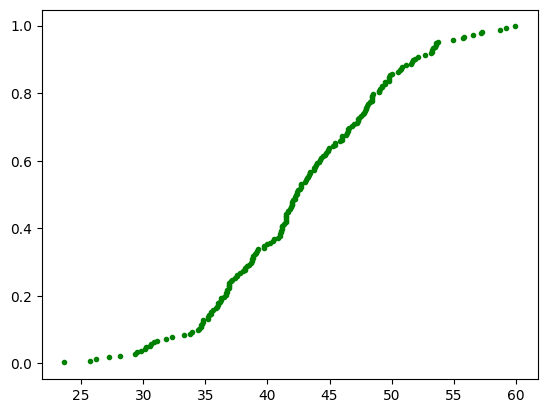

In [61]:
p_i_sorted = np.linspace(0.5/n, 1-0.5/n, n)
plt.plot(Y, p_i_sorted, 'g.')

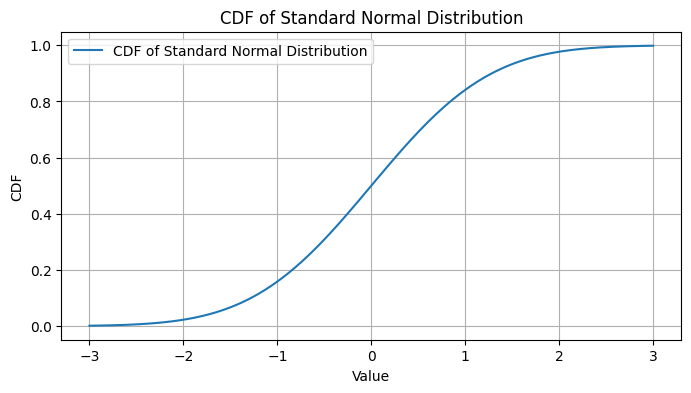

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of values for our CDF plot
x = np.linspace(-3, 3, 1000)

# Calculate the CDF values for these points
cdf_values = norm.cdf(x, 0, 1)  # mean = 0, std = 1 for a standard normal distribution

# Plotting the CDF
plt.figure(figsize=(8, 4))
plt.plot(x, cdf_values, label='CDF of Standard Normal Distribution')
plt.title('CDF of Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()
plt.show()


(array([  2.,   0.,   2.,   8.,  12.,  23.,  46.,  51.,  59.,  87.,  99.,
        119.,  98.,  86.,  82.,  76.,  58.,  40.,  21.,  15.,   8.,   4.,
          2.,   1.,   1.]),
 array([ 50.81218188,  54.92175193,  59.03132198,  63.14089203,
         67.25046208,  71.36003213,  75.46960218,  79.57917223,
         83.68874228,  87.79831233,  91.90788238,  96.01745244,
        100.12702249, 104.23659254, 108.34616259, 112.45573264,
        116.56530269, 120.67487274, 124.78444279, 128.89401284,
        133.00358289, 137.11315294, 141.22272299, 145.33229304,
        149.44186309, 153.55143314]),
 <BarContainer object of 25 artists>)

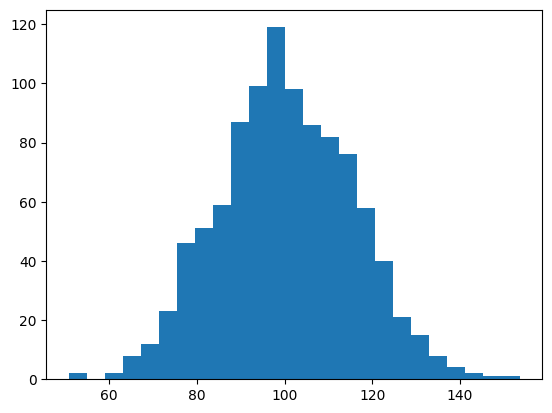

In [63]:
plt.hist(norm.rvs(loc=100, scale=15, size=1000), bins='auto')

(array([  2.,   5.,   4.,   4.,  14.,  34.,  43.,  49.,  77.,  76., 109.,
         87., 121.,  95.,  85.,  59.,  53.,  38.,  23.,   7.,   5.,   7.,
          0.,   3.]),
 array([ 54.0968967 ,  58.0489648 ,  62.00103289,  65.95310099,
         69.90516909,  73.85723719,  77.80930528,  81.76137338,
         85.71344148,  89.66550958,  93.61757767,  97.56964577,
        101.52171387, 105.47378197, 109.42585006, 113.37791816,
        117.32998626, 121.28205435, 125.23412245, 129.18619055,
        133.13825865, 137.09032674, 141.04239484, 144.99446294,
        148.94653104]),
 <BarContainer object of 24 artists>)

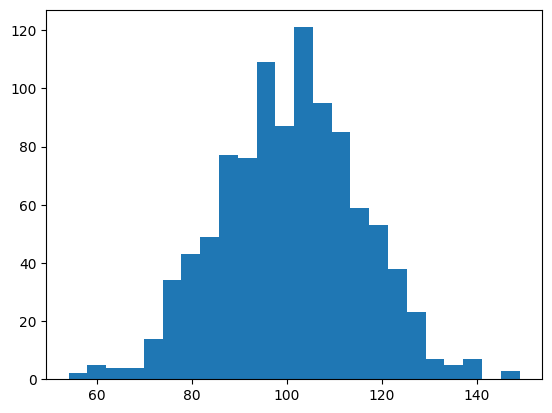

In [64]:
my_norm = norm(loc=100, scale=15)

plt.hist(my_norm.rvs(size=1000), bins='auto')

In [65]:
my_array = np.linspace(-3, 3, 20)

In [66]:
len(my_array)

20

In [67]:
my_array.shape

(20,)

In [68]:
my_array

array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])

In [69]:
norm.cdf(my_array)

array([0.0013499 , 0.00363507, 0.0089321 , 0.02005416, 0.04120752,
       0.07765073, 0.13452279, 0.2149176 , 0.31786256, 0.43726987,
       0.56273013, 0.68213744, 0.7850824 , 0.86547721, 0.92234927,
       0.95879248, 0.97994584, 0.9910679 , 0.99636493, 0.9986501 ])

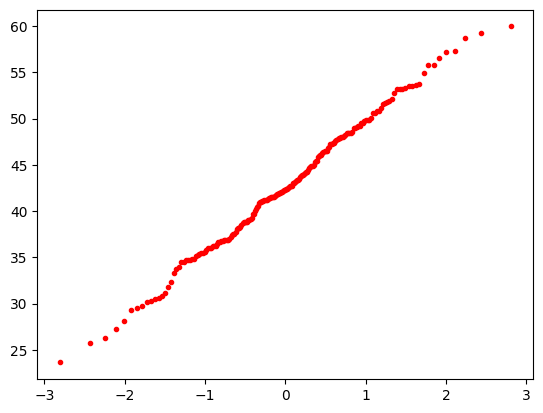

In [70]:
z_i_sorted = norm.ppf(p_i_sorted)
plt.plot(z_i_sorted, Y, 'r.')
plt.show()

HW: trovare come si aggiunge una interpolazione lineare e ottenere l'equazione relativa

HW: fare per l'esponenziale la stessa cosa vista a lezione


In [71]:
import pandas as pd

In [72]:
df = pd.read_excel(path, index_col=0)

In [73]:
df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


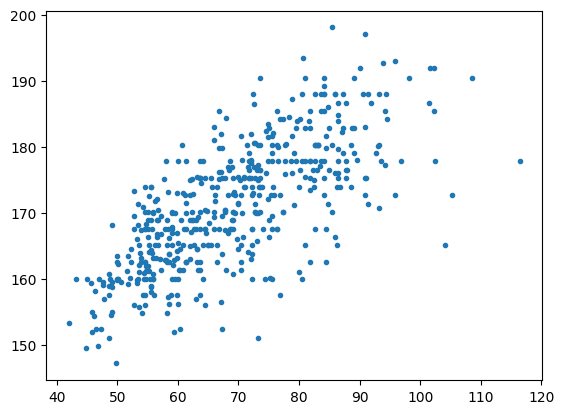

In [74]:
plt.plot(df['Weight (kg)'], df['Height (cm)'], '.')